In [1]:
# Importing libraries
import pandas as pd # for data analysis
import numpy as np # for numerical calculations and dealing with vectors and matrices
import seaborn as sns # visualization
from matplotlib import pyplot as plt # for visualization

In [2]:
df=pd.read_csv("Video_Game_Sales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.size

182578

In [5]:
df.shape

(16598, 11)

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Since the missing values are only about 1-2% we will drop them.

In [7]:
df=df.dropna()

In [9]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Exploratory Data Analysis (EDA)

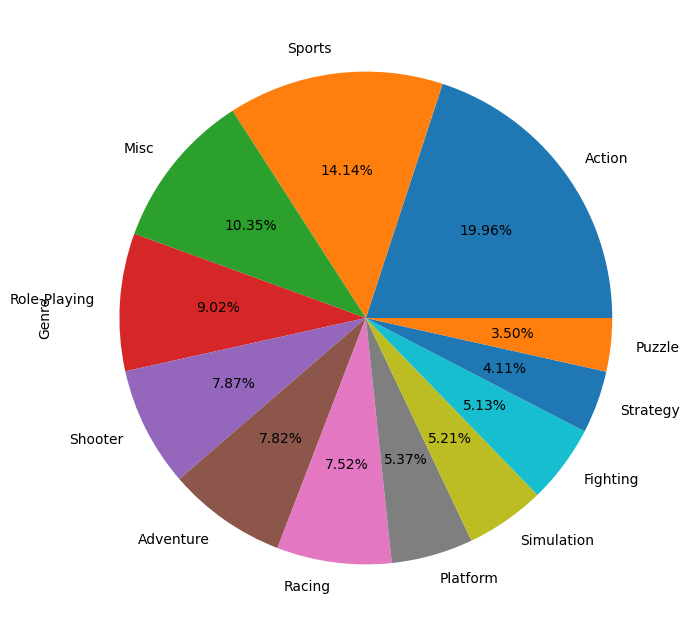

In [12]:
df['Genre'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (15,8))
plt.show()

In [13]:
# converting Year from float to int
df['Year'] = df['Year'].astype('int')

<ipython-input-13-10a3fe1e82fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('int')


Total Games Sold over the duration of years

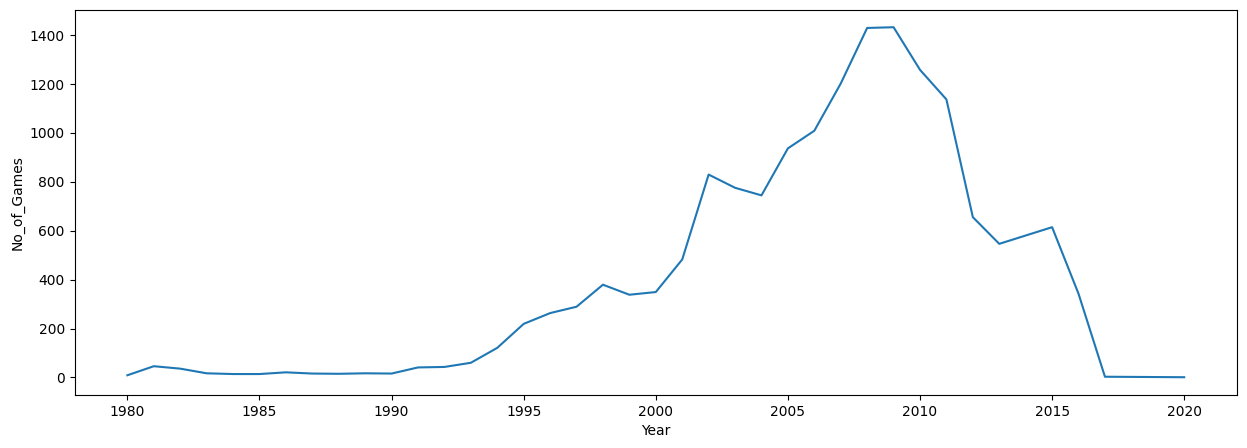

In [15]:
plt.figure(figsize=(15,5))
games = df.groupby(['Year']).count()['Name'].sort_values(ascending = False)
games = pd.DataFrame(games).reset_index()
games = games.rename(columns = {'Name':'No_of_Games'})
sns.lineplot(data=games, x=games['Year'], y=games['No_of_Games'])
plt.show()

Most Games published in a year.

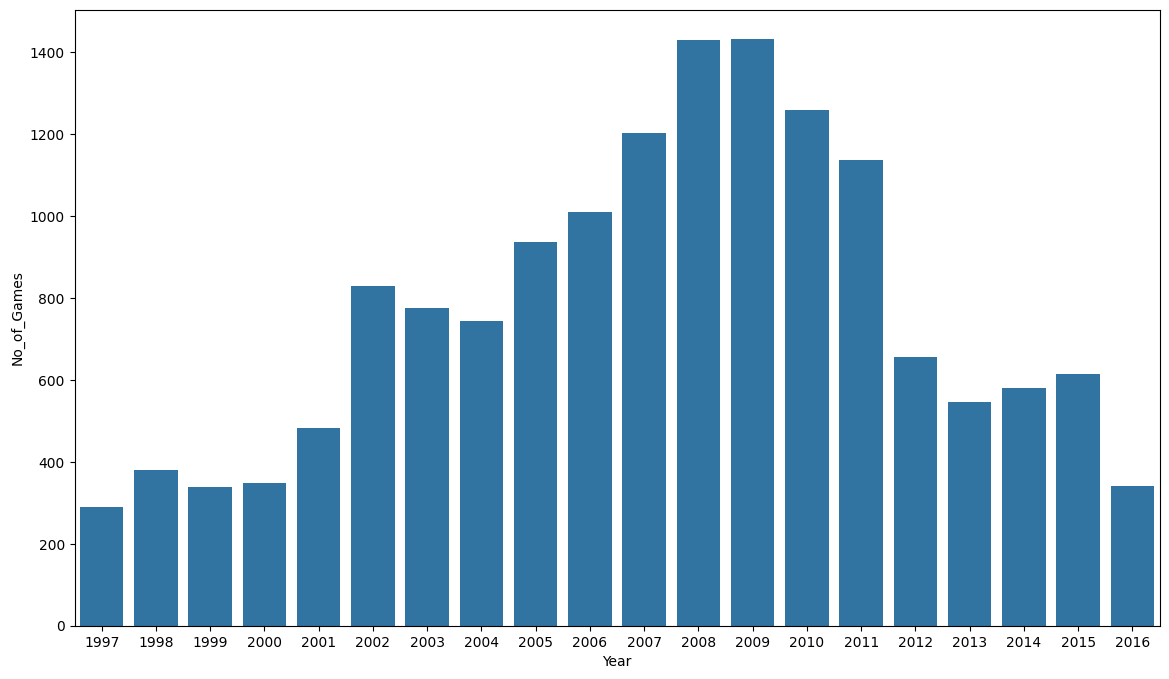

In [19]:
games = df.groupby(['Year']).count()['Name'].sort_values(ascending = False).head(20)
games = pd.DataFrame(games).reset_index()
games = games.rename(columns = {'Name':'No_of_Games'})
plt.figure(figsize=(14,8))
plot = sns.barplot(data=games, x=games['Year'], y=games['No_of_Games'])

Top 10 Sales.

In [21]:
top_sales_year = round(df.groupby(['Year']).sum()['Global_Sales'].sort_values(ascending = False).head(10),2)
top_sales_year = pd.DataFrame(top_sales_year).reset_index()
top_sales_year

<ipython-input-21-d5d535daa193>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_sales_year = round(df.groupby(['Year']).sum()['Global_Sales'].sort_values(ascending = False).head(10),2)


,Year,Global_Sales
0,2008,678.90
1,2009,667.30
2,2007,609.92
3,2010,600.29
4,2006,521.04
5,2011,515.80
6,2005,458.51
7,2004,414.01
8,2002,395.52
9,2013,368.11


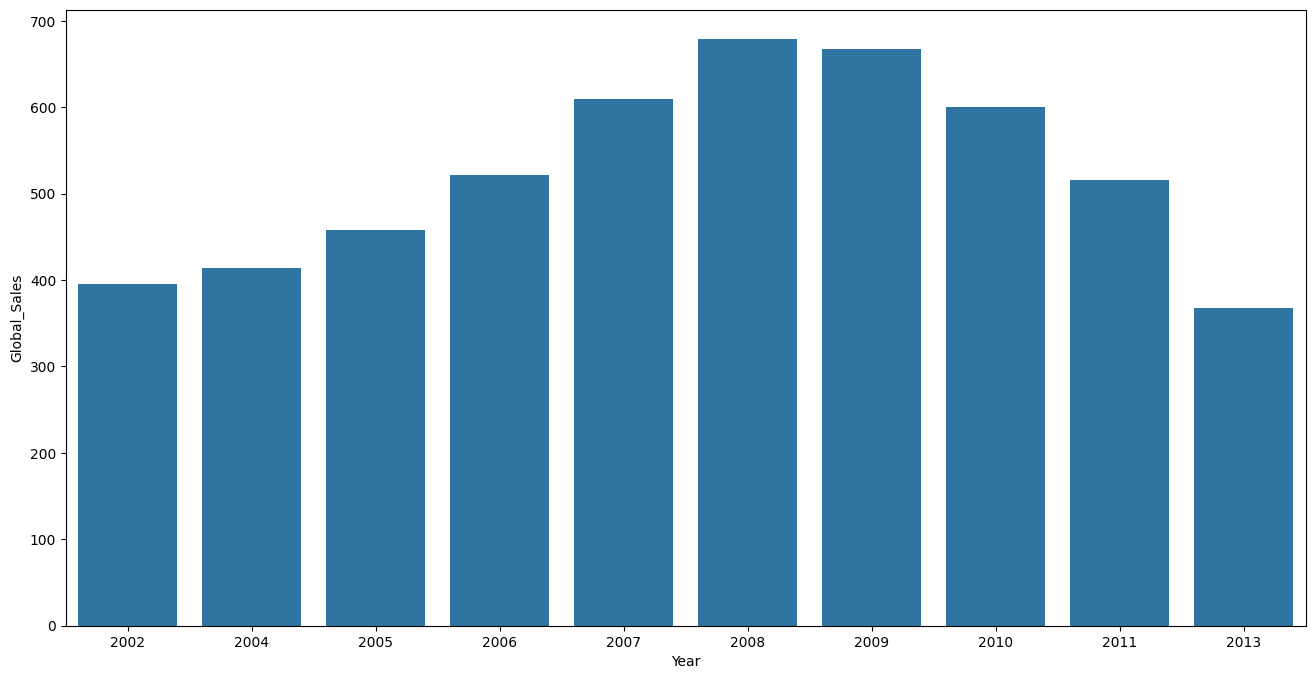

In [22]:
plt.figure(figsize=(16,8))
plot = sns.barplot(data=top_sales_year, x = top_sales_year['Year'], y = top_sales_year['Global_Sales'])

Top publishers with most games published.

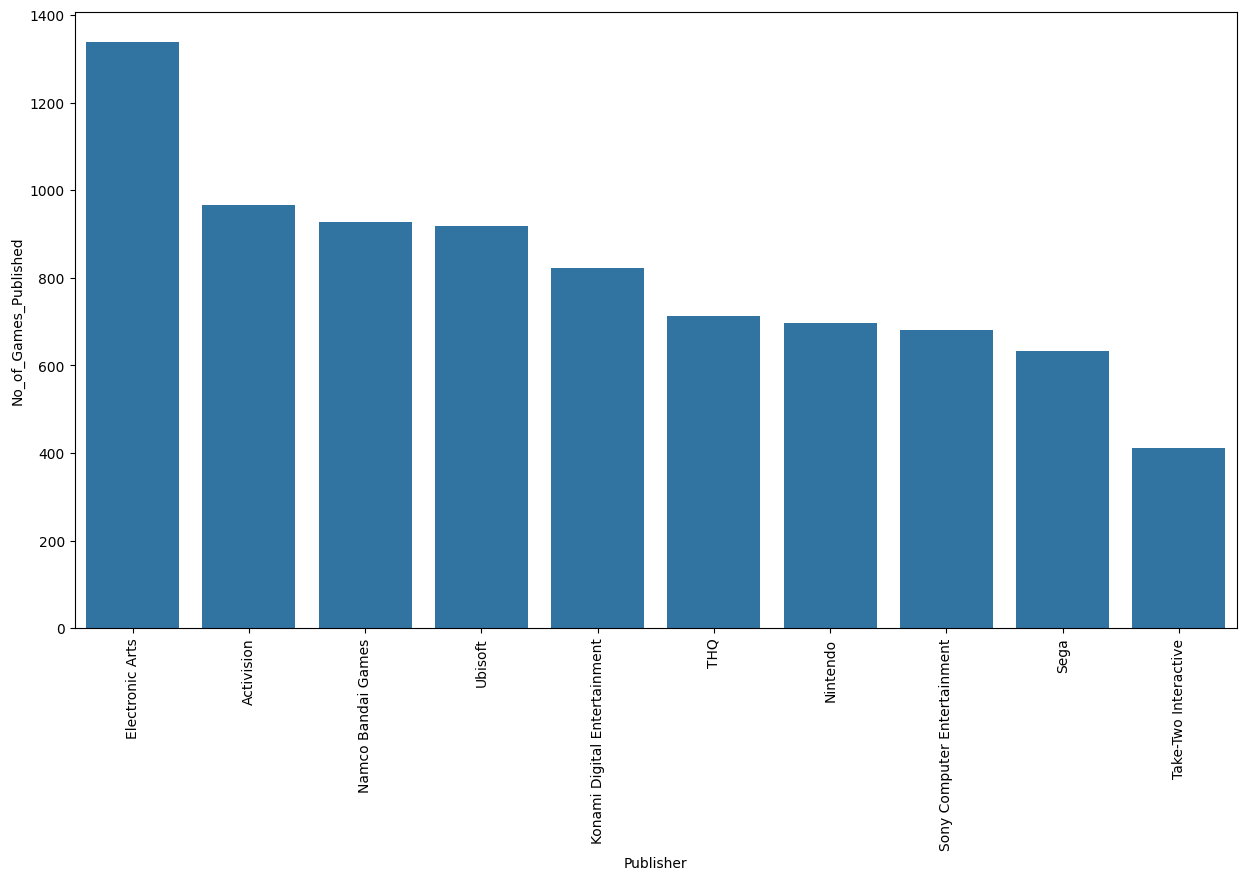

In [25]:
plt.figure(figsize=(15,8))
publisher = df.groupby(['Publisher']).count()['Rank'].sort_values(ascending = False).head(10)
publisher = pd.DataFrame(publisher).reset_index().rename(columns={'Rank':'No_of_Games_Published'})
plot = sns.barplot(data=publisher, x=publisher['Publisher'], y = publisher['No_of_Games_Published'])
plt.xticks(rotation = 90)
plt.show()

Platform with the highest sale prices.

<ipython-input-28-8e8f218cc38b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  platform = pd.DataFrame(round(df.groupby(['Platform']).sum()['Global_Sales'].sort_values(ascending = False).reset_index()))


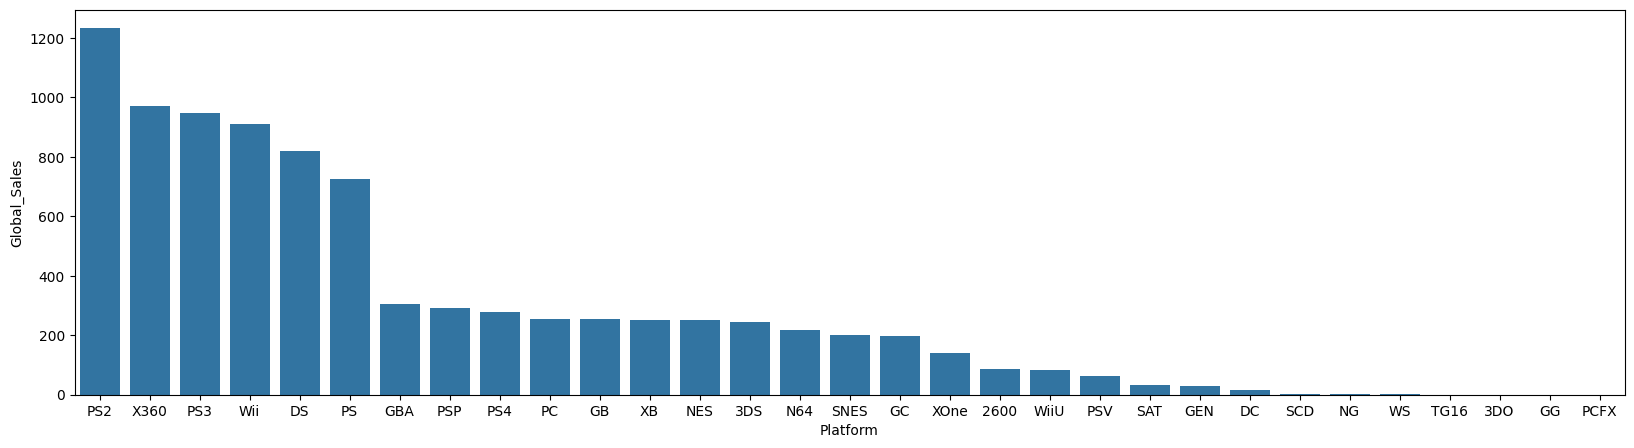

In [28]:
platform = pd.DataFrame(round(df.groupby(['Platform']).sum()['Global_Sales'].sort_values(ascending = False).reset_index()))
platform
plt.figure(figsize=(20,5))
plot = sns.barplot(data=platform, x='Platform', y='Global_Sales')
plt.show()

Linear Regression

<ipython-input-31-1ad9698f7958>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_back = df.corr()


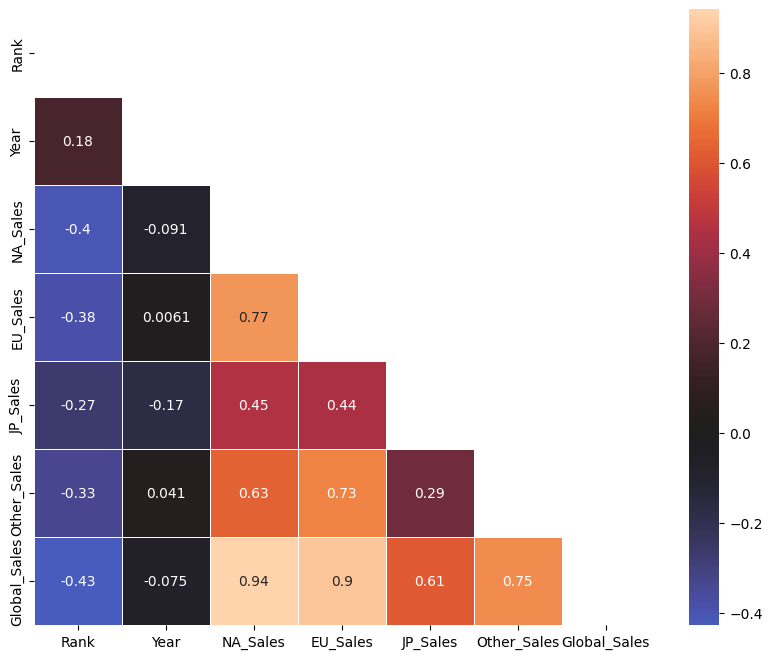

In [31]:
plt.figure(figsize=(10,8))
corr_back = df.corr()
mask = np.zeros_like(corr_back)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_back, mask=mask, center=0, square=True, annot=True, linewidths=.5)
plt.show()


From the heatmap we can notice that NA_sales, EU_sales, JP_Sales, Other_Sales are highly correlated. So we will only be considering them for our linear regression model.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [33]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Y = df['Global_Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [39]:
y_test_pred

array([0.18028833, 0.19028717, 0.03030023, ..., 0.16028746, 0.12029275,
       0.30027839])

In [40]:
y_train_pred

array([0.01030151, 0.10029378, 0.50025502, ..., 0.12029108, 0.09029388,
       0.74023147])

In [41]:
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print('r_square_train: ', r2_score_train)
print('rmse_train: ',rmse_train)

print('\n')
print('r_square_test: ', r2_score_test)
print('rmse_test: ', rmse_test)

r_square_train:  0.9999894146080166
rmse_train:  0.0052022610212742884


r_square_test:  0.9999863067614225
rmse_test:  0.005305269497287023


In [42]:
lr.intercept_

0.000302322002770139

In [43]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['coefficient'])

,coefficient
NA_Sales,0.999918
EU_Sales,0.999954
JP_Sales,0.999920
Other_Sales,0.999737


In [45]:
predictions_df = pd.DataFrame({'Actual_Global_Sales': y_test, 'Predicted_Global_Sales': y_test_pred})
predictions_df

,Actual_Global_Sales,Predicted_Global_Sales
7993,0.19,0.180288
7899,0.19,0.190287
14987,0.02,0.030300
10496,0.10,0.100292
14556,0.03,0.030300
...,...,...
6621,0.25,0.250278
7481,0.21,0.210286
8626,0.16,0.160287
9779,0.12,0.120293


In [48]:
import pandas as pd


csv_file_path = 'predictions.csv'


predictions_df.to_csv(csv_file_path, index=False)

print("DataFrame successfully saved to CSV file:", csv_file_path)

DataFrame successfully saved to CSV file: predictions.csv
